In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
train_preprocess = pickle.load(open("preprocess_date.pkl", "rb"))

In [3]:
weather_refined = pd.read_csv("weather+holyday_201807041434.csv")

In [4]:
weather_refined_drop = weather_refined.drop(["year","month","day","weekday","holiday","sunrise","sunset","snowfall","sealevel","codesum"], axis=1)
weather_refined_drop.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
19660,20,2014-10-27,85,66,75,6,59,65,0,10,0.0,29.11,10.0,18.0,10.4
19661,20,2014-10-28,80,68,74,5,60,65,0,9,0.0,29.30,3.1,36.0,6.4
19662,20,2014-10-29,78,55,66,-2,47,56,0,1,0.0,29.42,4.9,6.0,6.1
19663,20,2014-10-30,80,52,66,-2,50,57,0,1,0.0,29.40,1.6,14.0,4.9
19664,20,2014-10-31,68,50,59,-9,39,50,6,0,0.0,29.57,10.5,36.0,11.2


In [5]:
total = train_preprocess.merge(weather_refined_drop, on=["date", "station_nbr"], how='inner')
total.tail()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
229225,2014-10-30,39,111,3,1.386294,2014-10-30,8,0.0,0.0,3,...,-1,60,63,0,5,0.0,29.74,0.30,11.0,0.2
229226,2014-10-31,39,9,12,2.564949,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229227,2014-10-31,39,36,3,1.386294,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229228,2014-10-31,39,103,4,1.609438,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229229,2014-10-31,39,111,2,1.098612,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1


### Month 변수가 units에 유의미한 영향을 미친다
    - 예를들어 item 1, 2, 7은 월마다 판매량이 현저하게 차이난다

In [6]:
total_copy = total.copy()

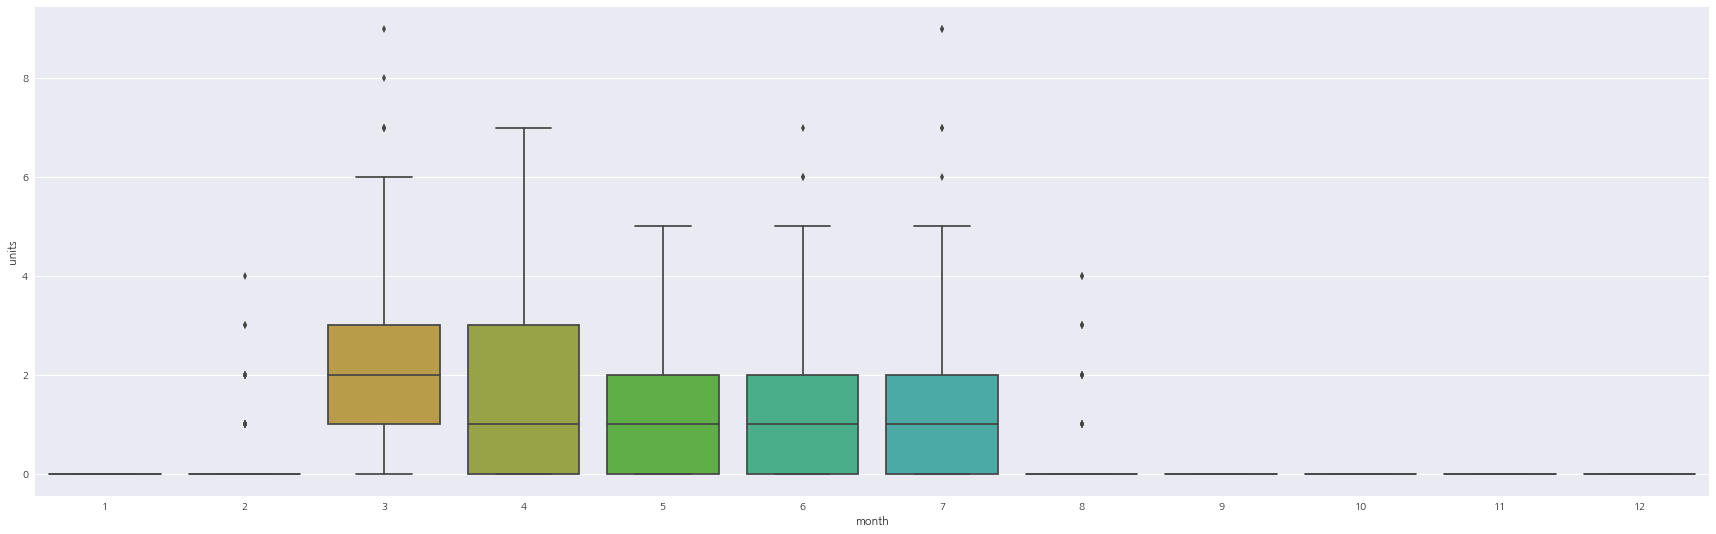

In [7]:
total_copy_item_1 = total_copy[total_copy["item_nbr"] == 1]
plt.figure(figsize=(30,9))
sns.boxplot(x="month", y="units", data=total_copy_item_1[["month", "units"]])

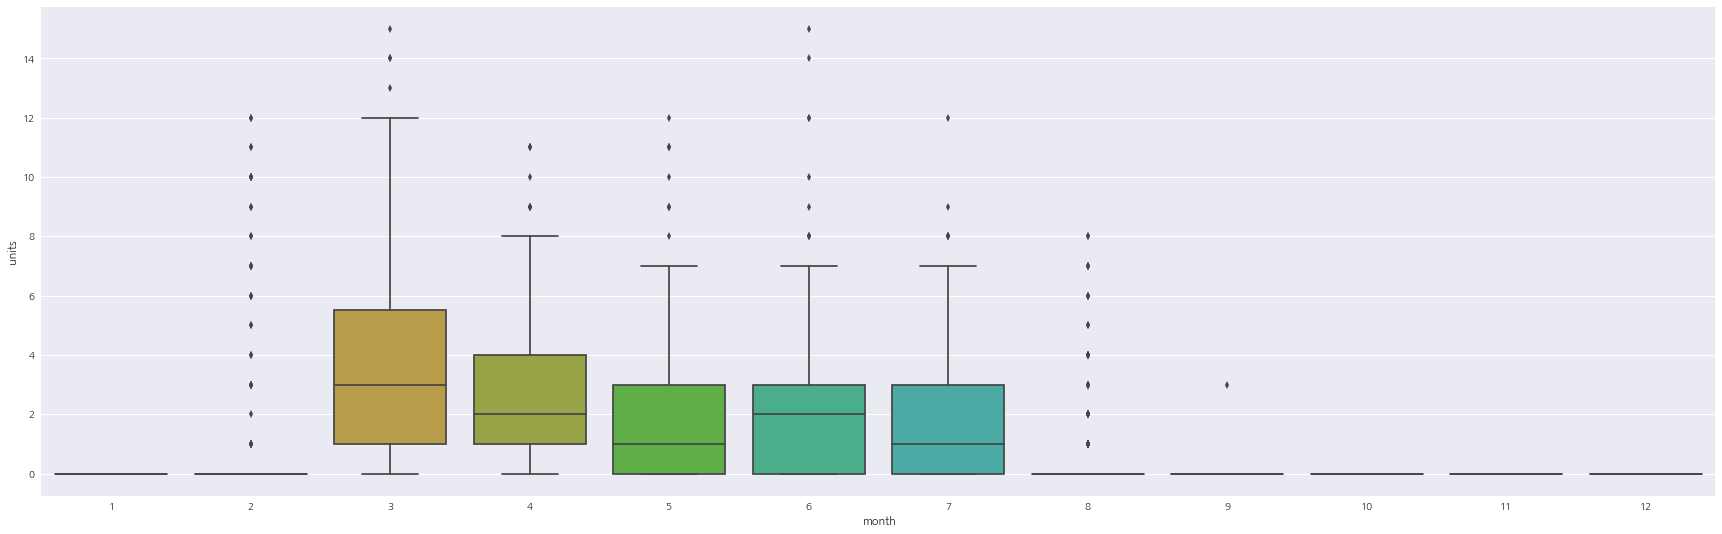

In [8]:
total_copy_item_2 = total_copy[total_copy["item_nbr"] == 2]
plt.figure(figsize=(30,9))
sns.boxplot(x="month", y="units", data=total_copy_item_2[["month", "units"]])

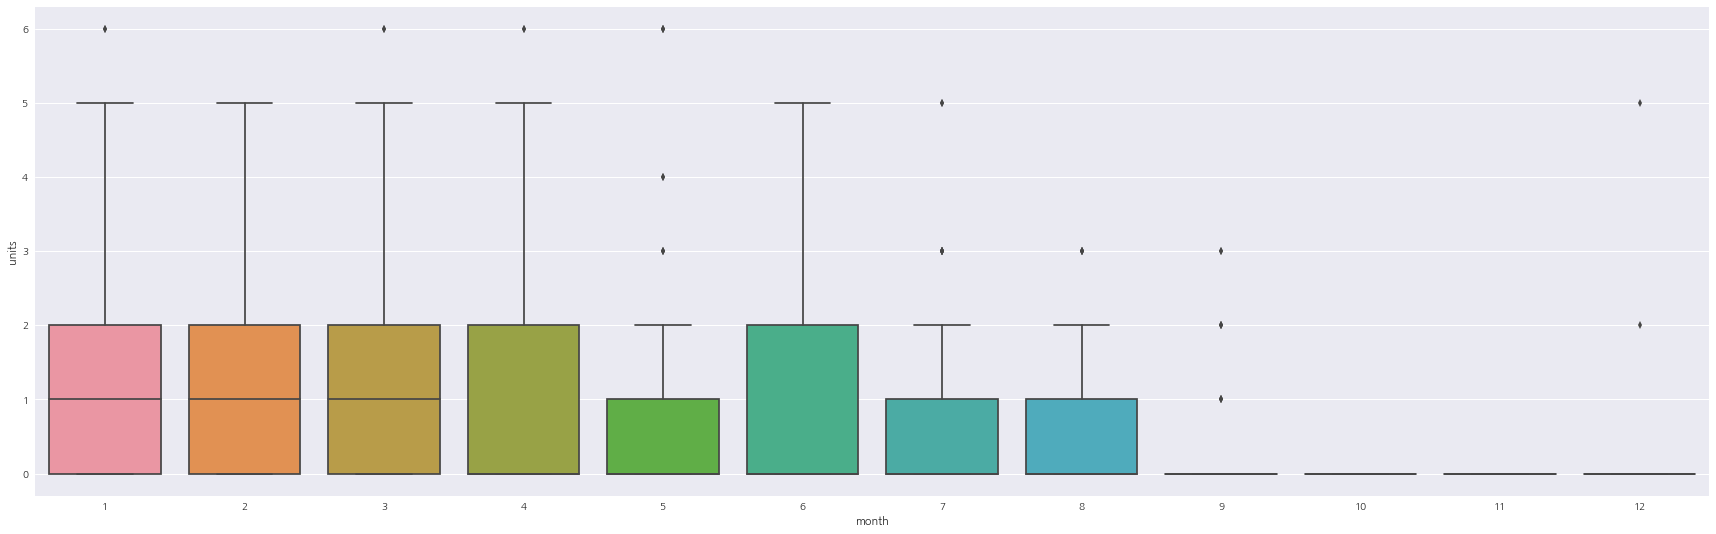

In [9]:
total_copy_item_7 = total_copy[total_copy["item_nbr"] == 7]
plt.figure(figsize=(30,9))
sns.boxplot(x="month", y="units", data=total_copy_item_7[["month", "units"]])

In [10]:
total_copy_del_outlier = total_copy[total_copy['units']<1000]

In [11]:
total_copy[total_copy['units']>1000]

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
161826,2012-11-15,37,5,5568,8.624971,2012-11-15,13,0.0,0.0,3,...,-7,26,31,31,0,0.00,24.48,2.5,15.0,4.8
174570,2013-11-21,37,5,3369,8.122668,2013-11-21,13,0.0,0.0,3,...,-22,11,14,46,0,0.08,24.47,7.0,2.0,7.5


In [12]:
# total_copy_item_5 = total_copy_del_outlier[total_copy_del_outlier["item_nbr"] == 5]
# plt.figure(figsize=(25,9))
# sns.boxplot(x="month", y="units", data=total_copy_item_5[["month", "units"]])

In [13]:
# total_copy_item_45 = total_copy_del_outlier[total_copy_del_outlier["item_nbr"] == 45]
# plt.figure(figsize=(25,9))
# sns.boxplot(x="month", y="units", data=total_copy_item_45[["month", "units"]])

### Month & Year 변수는 units에 유의미한 영향을 미친다

In [14]:
def getYearMonth(a):
    a = str(a)[:7]
    return a

In [15]:
total_copy["yearmonth"] = total_copy["date"].apply(getYearMonth)

    - item 4는 month 기준으로는 3~8월에 유의미하게 팔렸지만, month & year 기준으로는 꼭 그렇지만은 않다

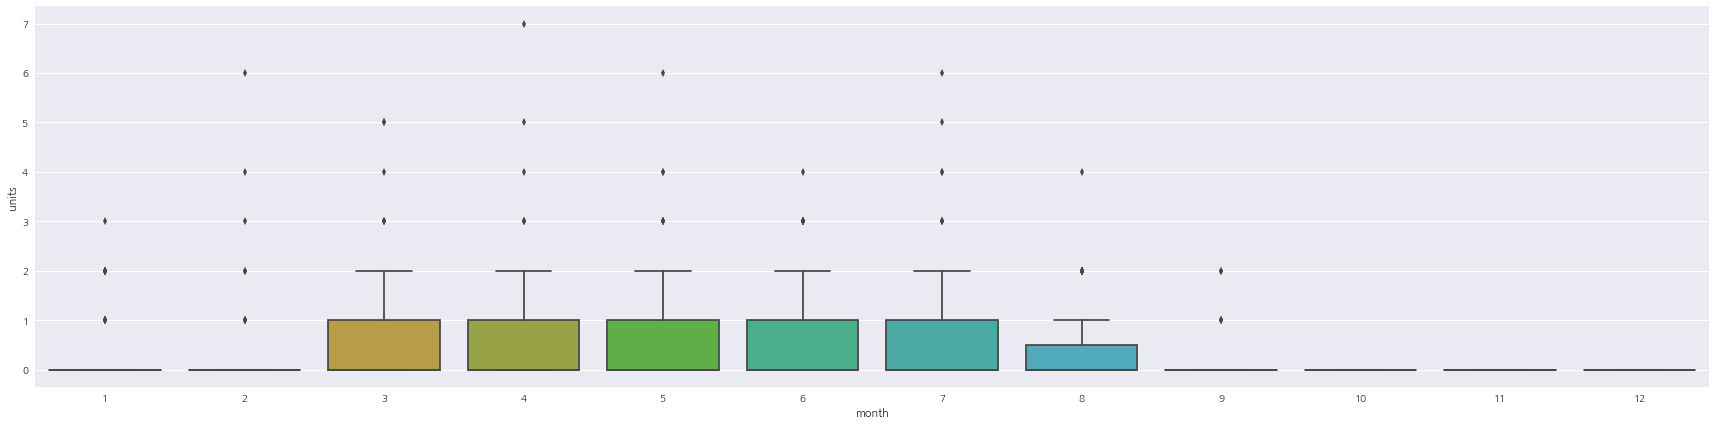

In [23]:
total_copy_item_4 = total_copy[total_copy["item_nbr"] == 4]
plt.figure(figsize=(30,7))
sns.boxplot(x="month", y="units", data=total_copy_item_4[["month", "units"]])

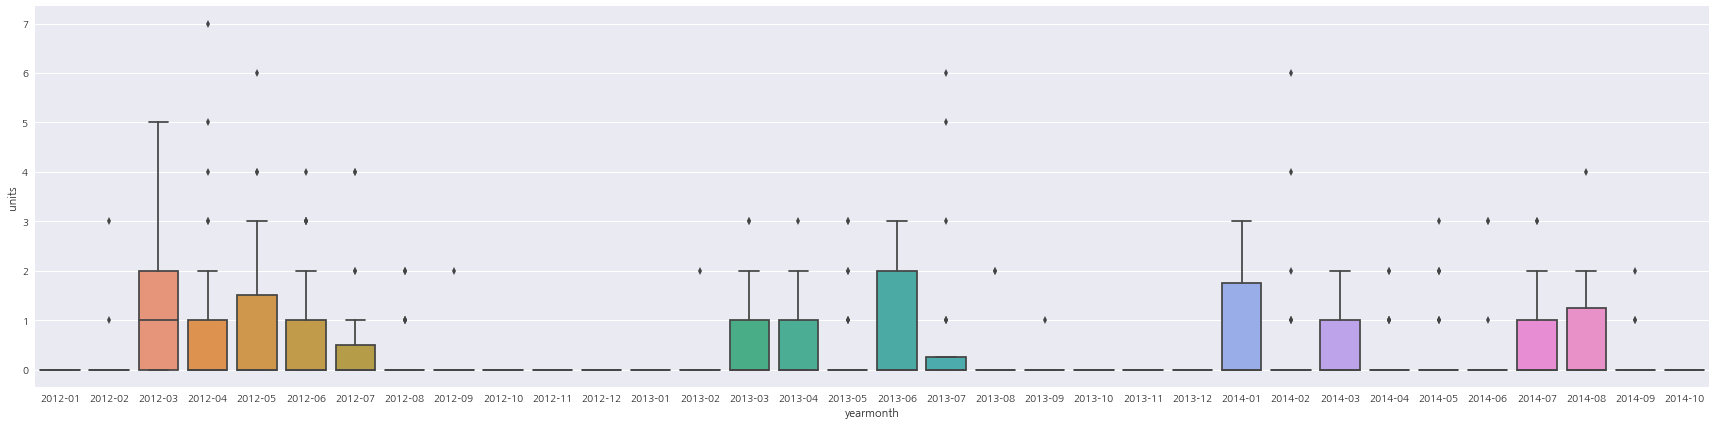

In [24]:
total_copy_item_4 = total_copy[total["item_nbr"] == 4]
plt.figure(figsize=(30,7))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_4[["yearmonth", "units"]])

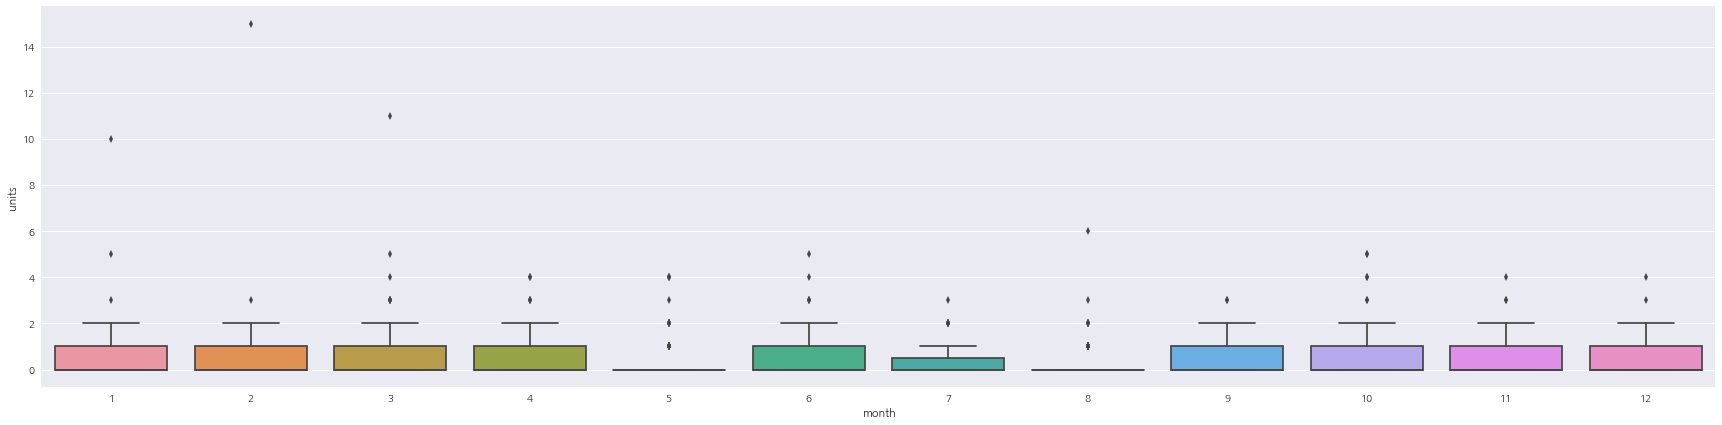

In [25]:
total_copy_item_12 = total_copy[total_copy["item_nbr"] == 12]
plt.figure(figsize=(30,7))
sns.boxplot(x="month", y="units", data=total_copy_item_12[["month", "units"]])

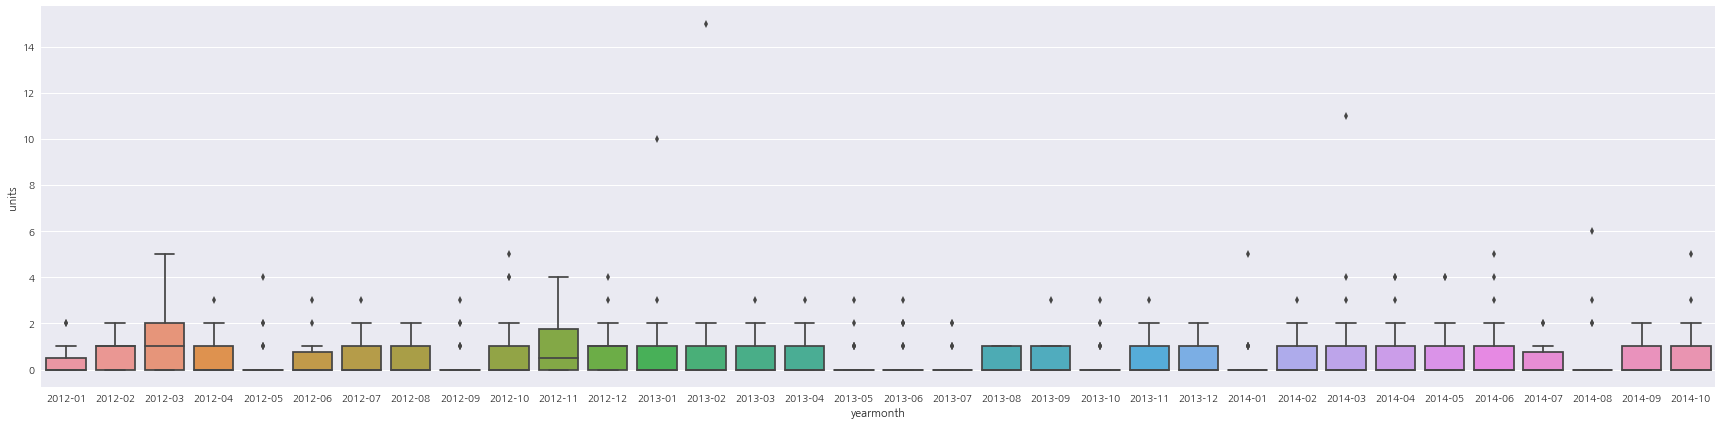

In [26]:
total_copy_item_12 = total_copy[total["item_nbr"] == 12]
plt.figure(figsize=(30,7))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_12[["yearmonth", "units"]])

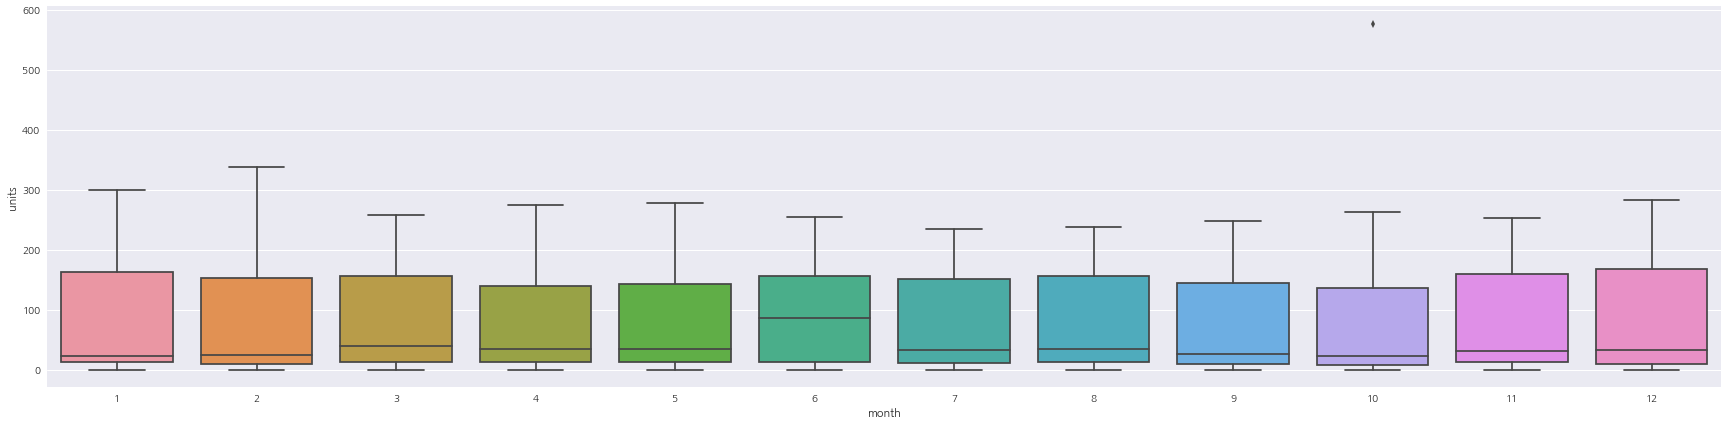

In [27]:
total_copy_item_25 = total_copy[total_copy["item_nbr"] == 25]
plt.figure(figsize=(30,7))
sns.boxplot(x="month", y="units", data=total_copy_item_25[["month", "units"]])

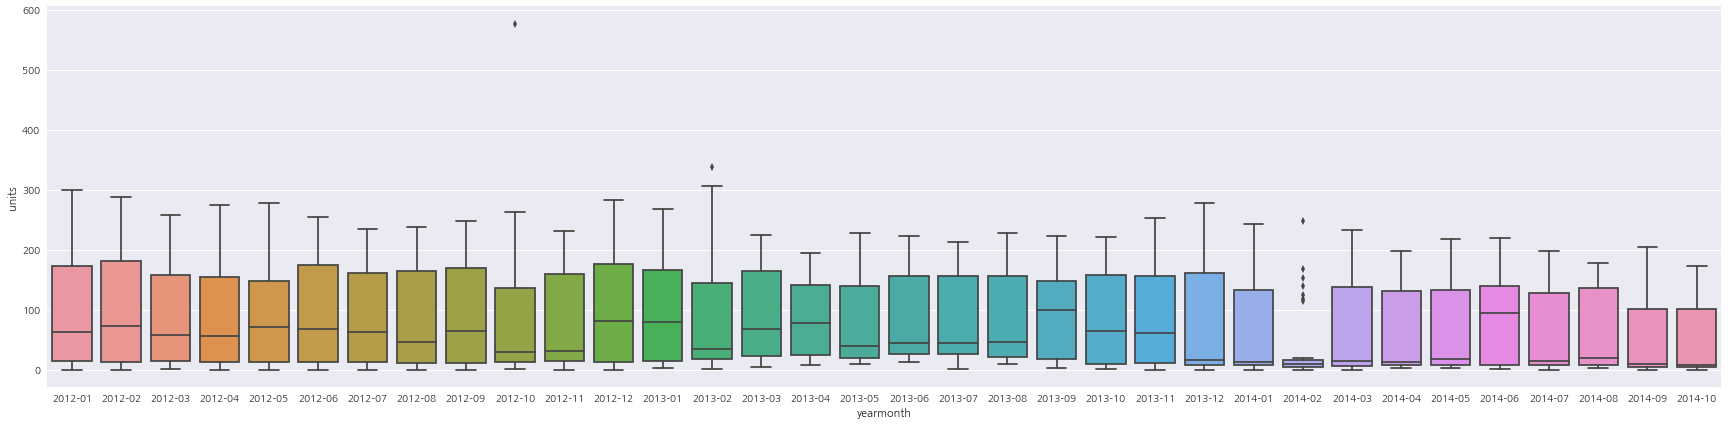

In [28]:
total_copy_item_25 = total_copy[total["item_nbr"] == 25]
plt.figure(figsize=(30,7))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_25[["yearmonth", "units"]])